### Qiskit

#### Basic elements

1. ClassicalRegister
    - for hold measurement results  
2. QuantumRegister
    - for regist quantum circuit  
3. QuantumCircuit
    - actual logics  

In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute

#### Quantum Simulator
Various simulators are exist in Qiskit. Each one has purposes.

In [3]:
from qiskit import BasicAer as Aer

In [5]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

#### Backend
*qasm_simulator*  
It runs a quantum algorithm and writes the measurement results to classical registers.

In [6]:
backend = Aer.get_backend('qasm_simulator')

In [7]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.measure(q[0], c[0])

In [8]:
job = execute(circuit, backend, shots=100)
result = job.result()
result.get_counts(circuit)

{'0': 100}

*statevector_simulator*  
It can simulate and inspect quantum states

In [9]:
backend = Aer.get_backend('statevector_simulator')

In [12]:
circuit = QuantumCircuit(q, c)
circuit.iden(q[0])
job = execute(circuit, backend)
state = job.result().get_statevector(circuit)
print(state)

[1.+0.j 0.+0.j]


#### Visualization

In [13]:
from qiskit.tools.visualization import circuit_drawer
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.measure(q[0], c[0])
circuit_drawer(circuit)

Initial state


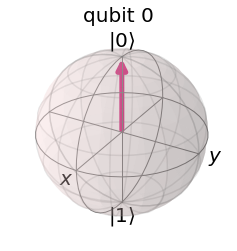

In [14]:
from qiskit.tools.visualization import plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
circuit = QuantumCircuit(q, c)
circuit.iden(q[0])
job = execute(circuit, backend)
state = job.result().get_statevector(circuit)
print("Initial state")
plot_bloch_multivector(state)

After a Hadamard gate


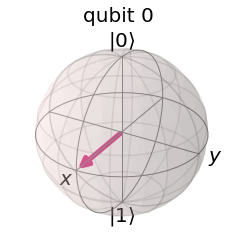

In [15]:
circuit.h(q[0])
job = execute(circuit, backend)
state = job.result().get_statevector(circuit)
print("After a Hadamard gate")
plot_bloch_multivector(state)

Initial state statistics


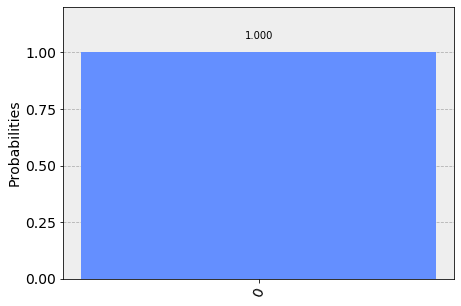

In [22]:
from qiskit.tools.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.measure(q[0], c[0])
job = execute(circuit, backend, shots=1000)
print("Initial state statistics")
plot_histogram(job.result().get_counts(circuit))

Statistics if we apply a Hadamard gate


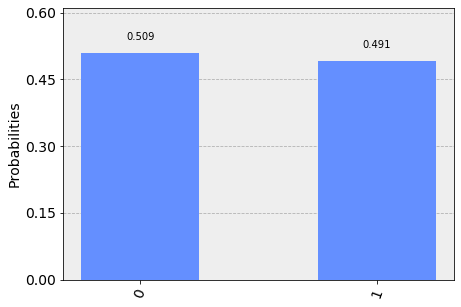

In [24]:
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q[0], c[0])
job = execute(circuit, backend, shots=1000)
print("Statistics if we apply a Hadamard gate")
plot_histogram(job.result().get_counts(circuit))